# Prieskumná analýza dát

## Predtým, ako sa do nej pustíme, zopár dôležitých pojmov...

### Typy otázok

* Deskriptívne
* Exploratívne
* Inferenčné
* Prediktívne
* Kauzálne

### Typické úlohy objavovania znalostí

* klasifikácia
* regresia
* zhlukovanie
* dolovanie vzorov

## Predtým, ako začnem analyzovať dáta, by som si mal ujasniť...

Aké otázky mám analýzou zodpovedať

Akú úlohu mám riešiť

## Mám dáta - čo teraz?

Skúsme ich načítať...

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012")
data.head()

,1990-01-01 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0
0,1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...
1,1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...
2,1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...
3,1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...
4,1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...


Vidíme, že pri načítaní nastalo viacero problémov - všetky dáta skončili v jednom stĺpci a navyše prvý riadok bol automaticky interpretovaný ako hlavička.

## Skúsme sa teda pozrieť na dáta v nejakom editore (postačí aj konzola) predtým, ako ich načítame

In [3]:
%%bash
head data/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0
1990-01-02	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	48.000	1	-999.000	0	-999.000	0	48.000	1	50.000	1	55.000	1	59.000	1	58.000	1	59.000	1	58.000	1	57.000	1	58.000	1	54.000	1	49.000	1	48.000	1
1990-01-03	51.000	1	50.000	1	47.000	1	48.000	1	51.000	1	52.000	1	58.000	1	57.000	1	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	69.000	1	74.000	1	-999.000	0	-999.000	0	103.000	1	84.000	1	75.000	1	-999.000	0	-999.000	0	-999.000	0
1990-01-04	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	67.000	1	57.000	1	57.000	1	-999.000	0	71.000	1	74.000	1	70.000	1	70.000	1	69.000	1	65.000	1	64

## Teraz už vieme načítať dáta lepšie

In [4]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


## Lessons learned

Už pred načítaním dát by sme sa mali sami seba spýtať:

* Odkiaľ sú dané dáta? Kto ich vytvoril?
* V akom formáte sú reprezentované?
* Koľko ich je?
* Je niekde dostupná interpretácia jednotlivých stĺpcov?

## Ciele prieskumnej analýzy

* Opis dát spolu s ich charakteristikami
* Formulácia a overenie hypotéz o dátach
* Identifikácia vzťahov medzi atribútmi
* Identifikácia problémov v dátach

... **Spoznať dáta**

### Možné problémy v dátach

* nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
* duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
* nejednotné formáty dát
* chýbajúce hodnoty
* vychýlené (odľahlé) hodnoty
* a ďalšie

In [5]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Typy atribútov

* Spojité (numerické)
* Diskrétne (kategorické) - nominálne vs. ordinálne

**Pozor na numerické atribúty, ktoré sú diskrétne - čísla len kódujú kategóriu**

## Analýza atribútov

### Po jednom (univariate)

* **spojité** - deskriptívna štatistika (priemer, medián, ...), rozdelenia; histogram, boxplot
* **kategorické** - počet unikátnych hodnôt, frekvencia ich výskytov; stĺpcový graf

### Párová analýza (bivariate)

* **spojitý-spojitý** - scatterplot, korelácia
* **spojitý-kategorický** - rozdiely v hodnote spojitého atribútu v závislosti od kategórie; boxplot, scatterplot, ...
* **kategorický-kategorický** - tabuľka, pomer početnosti hodnôt

In [7]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Analýza po jednom: Spojité atribúty

Chceme zobraziť, aký je tvar rozdelenia dát, či sa zoskupujú okolo nejakého **centra**, a aká je **rozptýlenosť** hodnôt

### Zobrazenie centrálnosti

* mean (priemer)
* median (medián, stredná hodnota): hodnota, ktorá rozdeľuje vyššie a nižšie hodnoty
* mode (modus, modálna hodnota, najpravdepodobnejšia hodnota): najčastejsia hodnota (hodnota s najväčšou pravdepodobnosťou výskytu)

In [8]:
x = np.array([1000, 1000, 1200, 1100, 10000])
x.mean()

2860.0

In [9]:
np.median(x)

1100.0

In [10]:
stats.mode(x)

ModeResult(mode=array([1000]), count=array([2]))

### Rozptýlenosť

* range (rozsah): max - min
* quartile (kvartil): hodnota, od ktorej je 25%, resp. 75% hodnôt väčších 
* percentile (percentil): hodnota, od ktorej je XX% hodnôt väčších
* inter quartile range (medzikvartilové rozpätie): rozdiel medzi 25% a 75% kvartilom, menej náchylné na outlierov ako rozsah
 

![boxplot](img/outlier_box_plot.gif)
   
(zdroj obrázku: https://taps-graph-review.wikispaces.com/Box+and+Whisker+Plots)  

* variance (variancia): priemerná kvadratická odchýlka od priemeru 
$$ E[(X-E[X])^2] $$
* standard deviation (štandardná odchýlka): druhá odmocnina variancie, je v jednotkách meranej premennej
* skewness (vychýlenosť, asymetrickosť): metrika (a)symetrickosti rozdelenia, či je rozdelenie navážené na jednu stranu 
* kurtosis (sploštenosť/ostrosť): aké množstvo dát je vo chvoste rozdelenia

## Skewness a kurtosis

### Skewness

Skewness je metrika toho, ako je rozdelenie symetrické. Úplne symetrické rozdelenie má hodnotu skewness rovnú 0. V podstate to porovnáva relatívnu veľkosť dvoch chvostov rozdelenia. 
Rozdelenie naklonené doľava bude mať skewness väčšiu ako 0, naklonené doprava bude mať menej ako 1.

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalne rozdelenie: Skewness -0.02594')

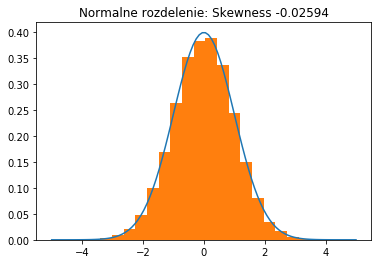

In [11]:
sample_size = 10000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Chi-kvadrat(5) rozdelenie: Skewness 1.11270')

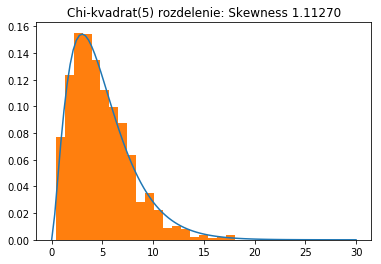

In [12]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'30 - Chi-kvadrat(5) rozdelenie: Skewness -1.31677')

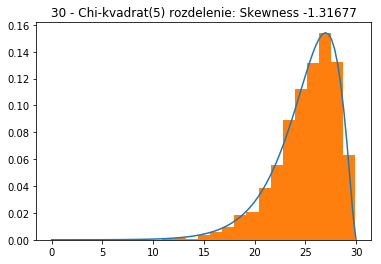

In [13]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = 30 - chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(30 - x))
plt.hist(sample, normed=True, bins=20)
plt.title("30 - Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

### Kurtosis

Kurtosis hovorí, aká je kombinovaná veľkosť chvostov. Meria množstvo dát sustredené v chvostoch. 
Veľmi často sa porovnáva k hodnote kurtosis normalného rozdelenia, ktorá je 3. 
Ak je to viac ako 3, tak viac dát je sustredených na okrajoch. Ak menej ako 3, tak je menej dát v okrajoch.

Často sa používa aj excess kurtosis, čo je rozdiel oproti normálnemu rozdeleniu, čize kurtosis - 3. 

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalne rozdelenie: Kurtosis -0.01868')

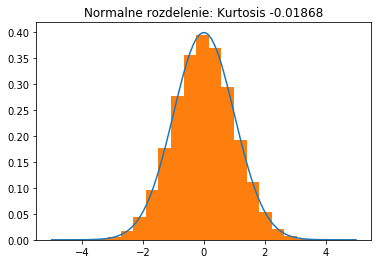

In [14]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample), ))

Defaultne vracia excess kurtosis.

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalne rozdelenie: Kurtosis 2.99742')

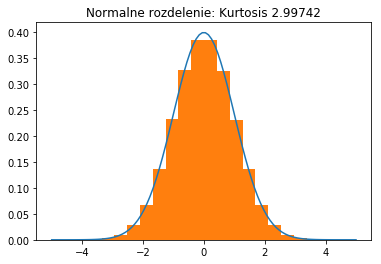

In [15]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))
# musime prestavit parameter fisher na False

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LogNormalne rozdelenie (1.0): Kurtosis 19.09204')

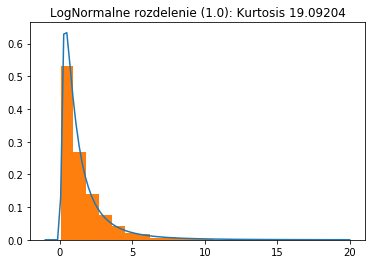

In [16]:
sample_size = 1000

lognorm = stats.lognorm(1)
x = np.linspace(-1, 20, 100)
sample = lognorm.rvs(sample_size)

plt.plot(x, lognorm.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("LogNormalne rozdelenie (1.0): ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))

In [17]:
sample_size = 10000
x = np.linspace(-5, 50, 100)

dists = [
    ("Chi2(5)", stats.chi2(5).pdf(x), stats.chi2(5).rvs(sample_size)),
    ("Chi2(10)", stats.chi2(10).pdf(x), stats.chi2(10).rvs(sample_size)),
    ("Chi2(30)", stats.chi2(30).pdf(x), stats.chi2(30).rvs(sample_size)),
    ("50 - Chi2(5)", stats.chi2(5).pdf(50 - x), 50 - stats.chi2(30).rvs(sample_size)),
    ("Norm", stats.norm(0, 1).pdf(x), stats.norm(0, 1).rvs(sample_size)),
    ("lognorm(0.5)", stats.lognorm(0.5).pdf(x), stats.lognorm(0.5).rvs(sample_size))
]

labels = []

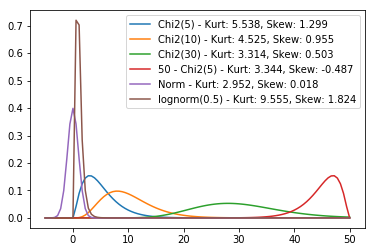

In [18]:
for name, dist, sample in dists:
    plt.plot(x, dist)
    labels.append("%s - Kurt: %.3f, Skew: %.3f" % (name, stats.kurtosis(sample, fisher=False), stats.skew(sample)))
    
plt.legend(labels)

## Vráťme sa k iris dátam...

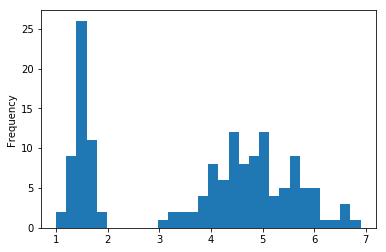

In [19]:
iris.petal_length.plot.hist(bins=30)

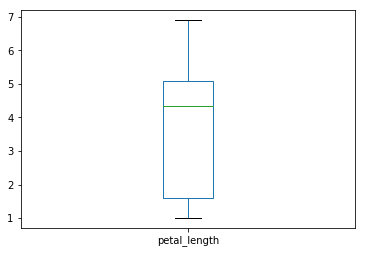

In [20]:
iris.petal_length.plot.box()

### QQ-plot
QQ-plot je vizuálna metóda na určenie, či dve dátove sady pochádzajú z rovnakého rozdelenia, resp. umožňuje porovnáť dátovú sadu s teoretickým rozdelením.

Porovnáva kvantily rozdelení; osy sú v jednotkách porovnávaných dátových sád. Bod v grafe zobrazuje hodnotu kvantilu v prvom a druhom porovnávanom datasete.

Ak sú datasety rovnako veľké, tak je to len vykreslenie usporiadaných datasetov pomocou scatterplotu. Ak je jeden menší, tak sa ten použije na určenie kvartilov a hodnoty z druhého (väčšieho) datasetu sa interpolujú.

#### Na aké otázky vie QQ-plot odpovedať?

* Pochádzajú pozorovania z rovnakého rozdelenia?
* Majú rozdelenia rovnakú škálu (priemer, štandardnú odchýlku)?
* Je tvar porovnávaných rozdelení podobný (rovná čiara, bez ohľadu na jej posunutie a sklon)? 
* Majú rozdelenia podobné vlastnosti skewness a kurtosis?

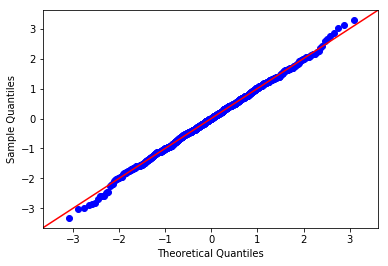

In [21]:
import statsmodels.api as sm
sample_size = 1000

x = np.linspace(-5, 5, 100)
sample = stats.norm(0, 1).rvs(sample_size)
_ = sm.ProbPlot(sample, fit=True).qqplot(line='45')

QQ-plot pri základnom nastavení porovnáva zadanú distribúciu s normálnym rozdelením. Toto však vieme zmeniť na iné rozdelenie.

https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot


![QQ-plot](img/qq-plot.png)

## Analýza po jednom: Kategorické atribúty

Tu je najčastejším spôsobom zobrazenia frekvenčná tabuľka zobrazujúca buď počty pozorovaní per unikátna hodnota atribútu alebo pomer voči celkovému počtu pozorovaní. 

Na grafickú vizualizáciu sa používa stĺpcový graf (bar plot).

In [22]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [24]:
diamonds.color.value_counts() / len(diamonds)

G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64

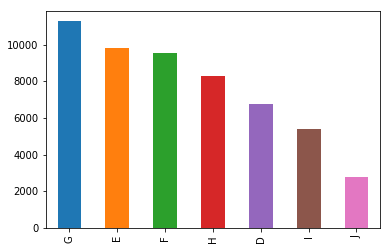

In [25]:
diamonds.color.value_counts().plot(kind='bar')

### Kedy je vhodné použiť stĺpcový, a kedy koláčový graf? Aké sú ich výhody a nevýhody?

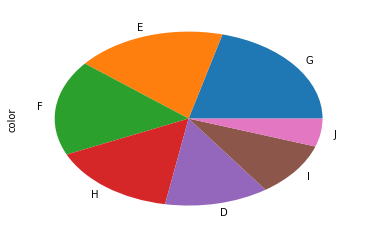

In [26]:
diamonds.color.value_counts().plot(kind='pie')

### Dôležité pri klasifikačnej úlohe je poznať distribúciu (početnosť) jednotlivých tried

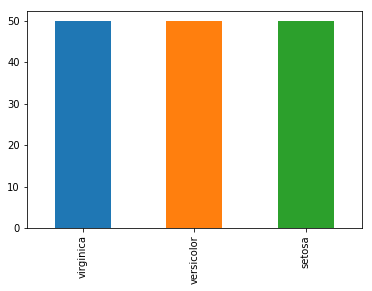

In [27]:
iris.species.value_counts().plot(kind='bar')

## Párová analýza

### Spojitý - spojitý: Scatter plot

Najčastejší spôsob ako vizualizovať vzťah dvoch spojitých atribútov.

Zobrazuje rozmiestnenie v priestore hodnôt. 

Dá sa použiť aj na vizualizovanie skupín pozorovaní. Typicky na to, aby sme zistili, či sú v dátach nejaké prirodzené zhluky.

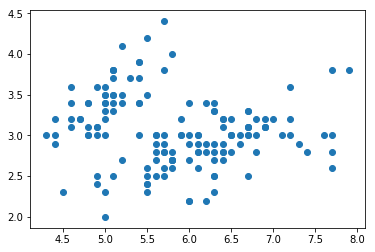

In [28]:
plt.scatter(iris.sepal_length, iris.sepal_width)

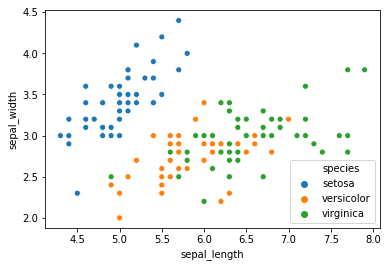

In [29]:
sns.scatterplot(iris.sepal_length, iris.sepal_width, hue=iris.species)

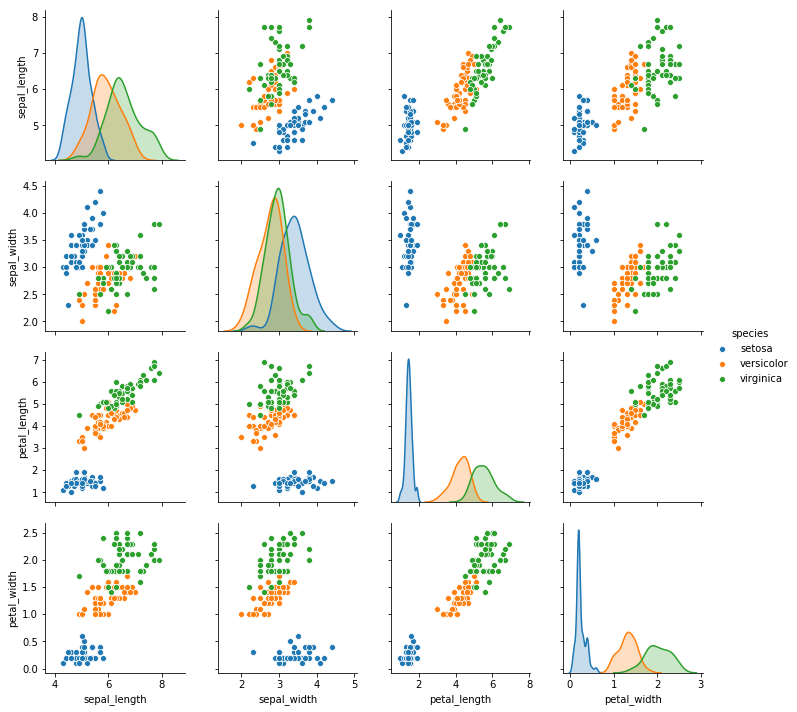

In [30]:
sns.pairplot(iris, hue="species")

#### Scatterplot sa dá použiť nie len na vizualizovanie zhlukov, ale aj korelácií / závislostí.

Nedokáže však kvantifikovať silu vzťahu. Na to potrebujeme nejakú inú metriku - koreláciu.

![scatter plot correlation](img/scatter-continuous-contunious.png)

Zdroj obrázku: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one

## Korelacia

Hodnota v rozsahu [-1, 1], ktorá hovorí o tom, aký silný lineárny vzťah je medzi atribútmi.

* -1 perfektná negatívna korelácia
* 0 žiadna korelácia
* 1 perfektná kladná korelácia

Pearsnov korelačný koeaficient:
$$ corr(X, Y) = \frac{cov(X,Y)}{E[X]E[Y]} = \frac{E[(X-E[X])(Y-E[Y])]}{E[X]E[Y]}$$

In [31]:
car_data = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, 
                       names = ['mpg', 'cylinders', 'displacement','horsepower',
                                'weight', 'acceleration', 'model_year', 'origin', 'name'],
                        na_values='?'
                      )
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [32]:
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Pearson correlation: -0.778


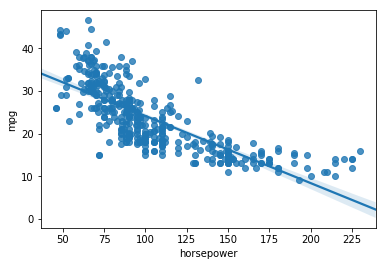

In [33]:
car_data = car_data.dropna()

sns.regplot(x="horsepower", y="mpg", data=car_data)
print("Pearson correlation: %.3f" % car_data.horsepower.corr(car_data.mpg))

In [34]:
car_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


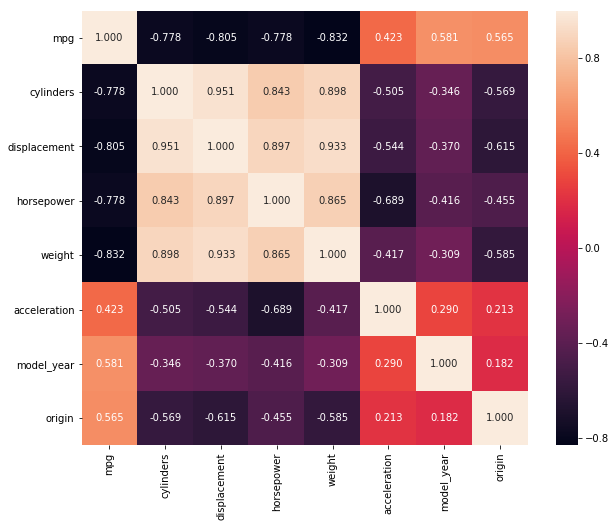

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(car_data.corr(), ax=ax, annot=True, fmt=".3f")

## Párová analýza: Kategorický - kategorický

* Two-way table
* Heatmap
* Stacked bar plot
* Chi-kvadrát testy

In [36]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Frekvencna tabulka
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
survived_class = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"])
survived_class.index= ["died","survived"]
survived_class

Pclass,1,2,3
died,80,97,372
survived,136,87,119


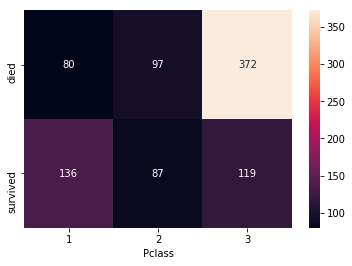

In [39]:
sns.heatmap(survived_class, annot=True, fmt="d")

Pclass,1,2,3
died,0.37037,0.527174,0.757637
survived,0.62963,0.472826,0.242363


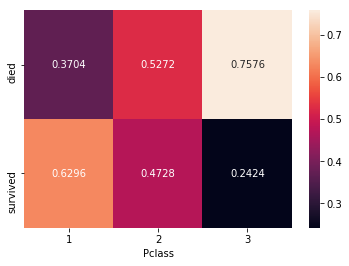

In [40]:
survived_class_perc = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"],
                            normalize='columns') #'index', 'all'
survived_class_perc.index= ["died","survived"]

sns.heatmap(survived_class_perc, annot=True, fmt=".4f")
survived_class_perc

In [41]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], titanic["Sex"]],
            margins=True)

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

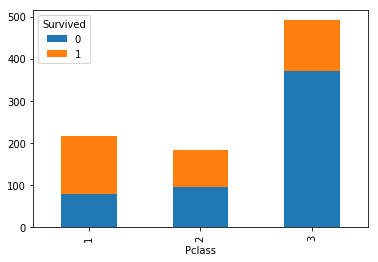

In [42]:
pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]).plot.bar(stacked=True)

## Párová analýza: Spojitý - kategorický

Tu sa najčastejšie používa rozdeľovanie podľa kategorickej hodnoty a zobrazovanie rozdelení podmnožín numerických hodnôt napríklad pomocou histogramov alebo box-plotov.

Čize viacnásobné použitie vizualizácií, ktoré sa použivajú na zobrazenie spojitých atribútov.

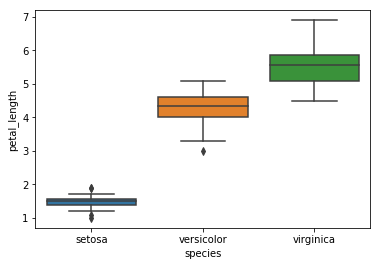

In [43]:
sns.boxplot('species', 'petal_length', data=iris)